https://www.tensorflow.org/tutorials/quickstart/beginner

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.compat.v1.enable_eager_execution()
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.6.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

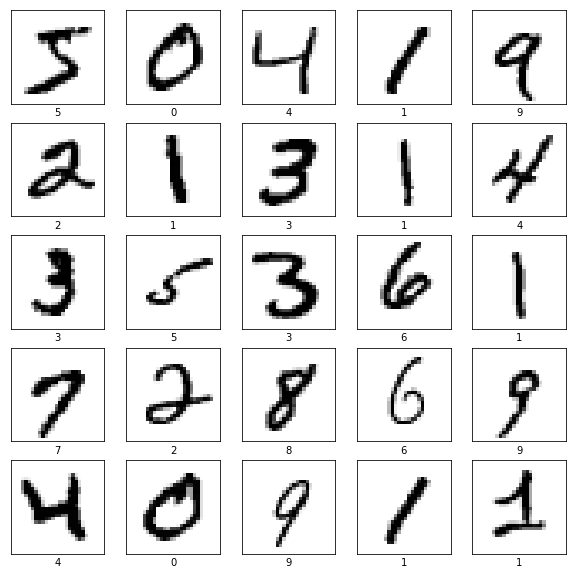

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [7]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [8]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.08002217,  0.10012446, -0.0793277 , -0.04860497, -0.10657893,
        -0.03571454, -0.01059326,  0.04599906, -0.01081241,  0.03770618]],
      dtype=float32)

In [9]:
tf.nn.softmax(predictions).numpy()

array([[0.09387995, 0.11241119, 0.09394518, 0.09687622, 0.09141961,
        0.09813308, 0.10062954, 0.10648862, 0.10060748, 0.10560917]],
      dtype=float32)

In [10]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [11]:
loss_fn(y_train[:1], predictions).numpy()

2.3214307

In [12]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 755us/step - loss: 0.2653 - accuracy: 0.9204
Epoch 2/5
1875/1875 [==============================] - 1s 752us/step - loss: 0.1218 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 1s 762us/step - loss: 0.0905 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 1s 758us/step - loss: 0.0701 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 1s 745us/step - loss: 0.0600 - accuracy: 0.9826


In [14]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1011 - accuracy: 0.9719


[0.10109320282936096, 0.9718999862670898]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [16]:
model.save_weights('digit/ann_do')

In [17]:
model_new = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [18]:
model_new.load_weights('digit/ann_do')

In [19]:
probability_model = tf.keras.Sequential([
  model_new,
  tf.keras.layers.Softmax()
])

In [20]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[7.08505581e-07, 5.49759308e-04, 2.97504612e-05, 2.15679520e-05,
        4.23844613e-05, 2.30050318e-07, 2.98758995e-09, 9.97290134e-01,
        5.37596270e-06, 2.06015888e-03],
       [7.90922059e-05, 1.33668282e-03, 9.97690439e-01, 7.80622067e-05,
        5.10627942e-05, 1.04906176e-05, 1.29630935e-05, 6.77197648e-04,
        6.24464883e-05, 1.65715528e-06],
       [1.71052719e-08, 9.99974728e-01, 1.03937384e-06, 2.99271136e-07,
        3.65210803e-06, 8.82880954e-07, 1.07298433e-07, 8.76562353e-06,
        8.23972641e-06, 2.35982543e-06],
       [9.99995828e-01, 5.92930978e-13, 2.23565621e-07, 1.95520844e-09,
        2.17020073e-08, 1.58683335e-07, 1.74284776e-06, 7.59516183e-07,
        8.15955502e-07, 4.89377044e-07],
       [8.00780185e-07, 3.26293139e-06, 1.07890344e-06, 3.10769366e-08,
        9.96917129e-01, 5.23982135e-06, 2.90746193e-05, 4.25978169e-06,
        7.33541924e-07, 3.03828903e-03]], dtype=float32)>

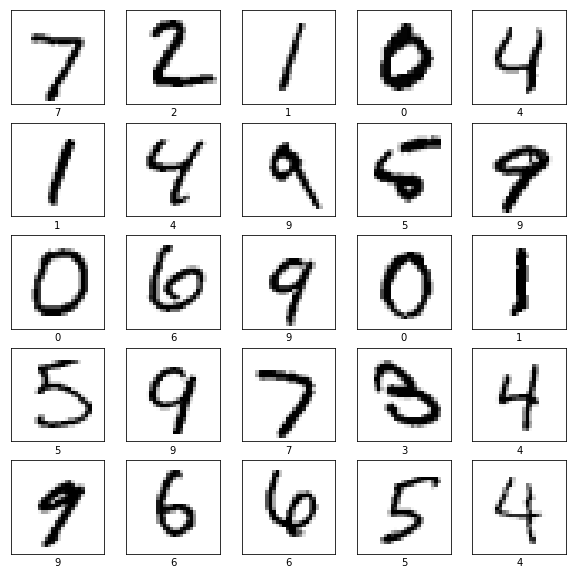

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


In [23]:
predictions = probability_model.predict(x_test)

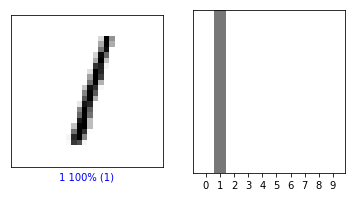

In [24]:
i = 2
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

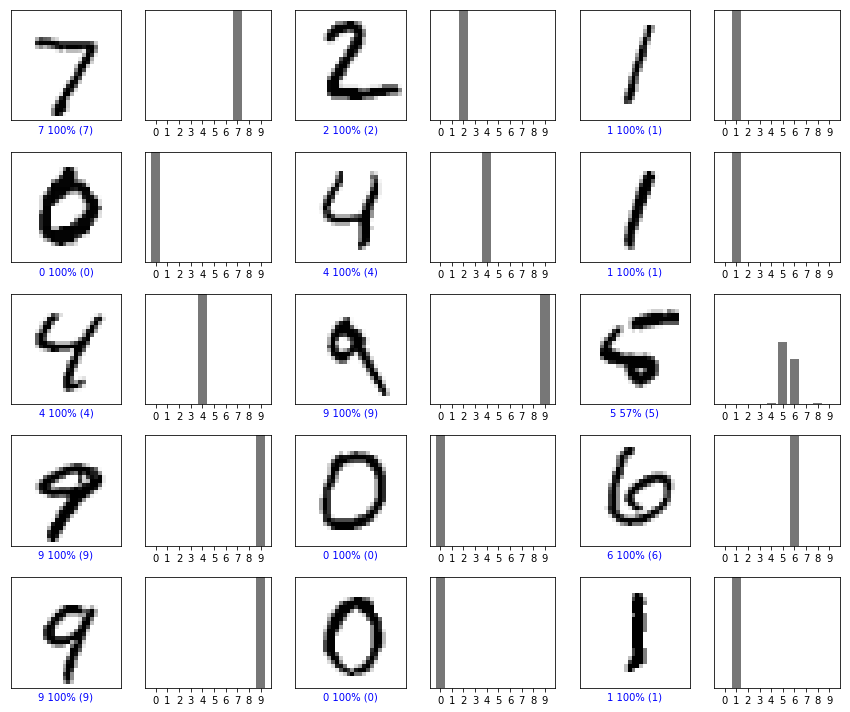

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i],  y_test)
plt.tight_layout()
plt.show()
